In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = datasets.load_iris(as_frame=True).frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


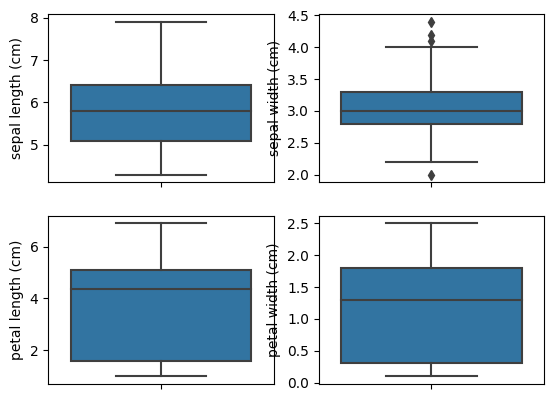

In [8]:
cols = df.columns[0:-1]

plt.figure()

for i, col in enumerate(cols, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])

plt.show()

- It can be observed that there are outliers in column `sepal width (cm)`

In [9]:
q1 = df['sepal width (cm)'].quantile(0.25)
q2 = df['sepal width (cm)'].quantile(0.75)
iqr = q2 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q2+1.5*iqr)]

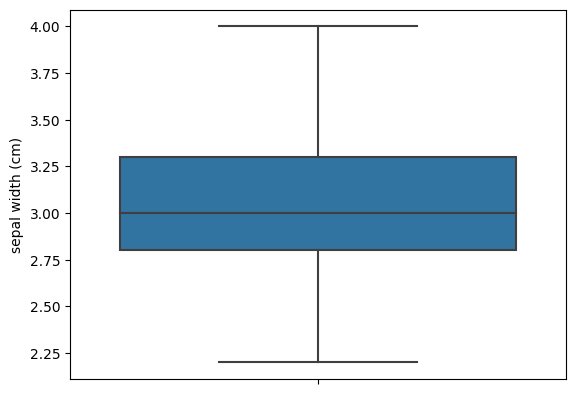

In [10]:
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [11]:
# Splitting the data into train and test sets
X = df.drop("target", axis=1)
Y = df["target"]
scaler = StandardScaler()
X = scaler.fit_transform(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [12]:
dt = KNeighborsClassifier()
dt.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
Y_pred = dt.predict(X_test)
df['pred'] = dt.predict(X)
print('Accuracy of KNN: ', accuracy_score(Y_pred, Y_test))

Accuracy of KNN:  0.972972972972973


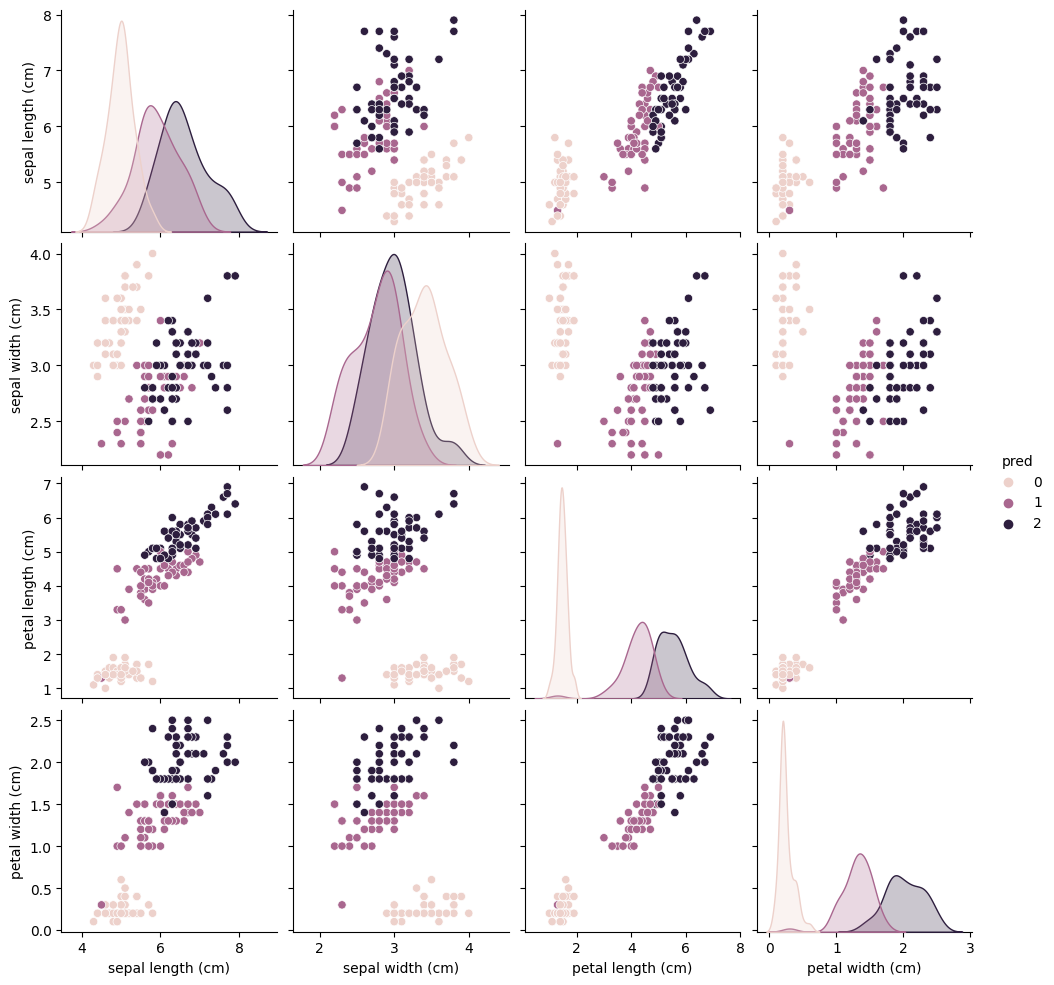

In [15]:
df_ = df.drop('target', axis=1)
sns.pairplot(df_, hue='pred')